In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, mean_squared_error,r2_score
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv(r'C:\Users\user\Desktop\Python\Phitron\ML\Datasets\Exam_Score_Prediction.csv' )
df.head(10)

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7
5,6,23,male,b.tech,3.48,65.4,yes,4.2,good,mixed,low,moderate,58.2
6,7,17,female,b.tech,1.35,69.0,yes,7.4,average,online videos,high,hard,53.7
7,8,22,male,b.sc,5.48,51.1,yes,8.2,poor,self-study,low,moderate,47.3
8,9,18,other,bca,2.89,92.0,yes,6.6,poor,self-study,low,easy,44.9
9,10,17,male,bba,6.77,44.8,yes,9.8,average,group study,high,moderate,77.7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        20000 non-null  int64  
 1   age               20000 non-null  int64  
 2   gender            20000 non-null  object 
 3   course            20000 non-null  object 
 4   study_hours       20000 non-null  float64
 5   class_attendance  20000 non-null  float64
 6   internet_access   20000 non-null  object 
 7   sleep_hours       20000 non-null  float64
 8   sleep_quality     20000 non-null  object 
 9   study_method      20000 non-null  object 
 10  facility_rating   20000 non-null  object 
 11  exam_difficulty   20000 non-null  object 
 12  exam_score        20000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 2.0+ MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
student_id,20000.0,10000.504600,5773.654959,1.000,5000.75,10000.50,15000.25,20001.00
age,20000.0,20.473300,2.284458,17.000,18.00,20.00,22.00,24.00
study_hours,20000.0,4.007604,2.308313,0.080,2.00,4.04,6.00,7.91
class_attendance,20000.0,70.017365,17.282262,40.600,55.10,69.90,85.00,99.40
sleep_hours,20000.0,7.008560,1.732090,4.100,5.50,7.00,8.50,9.90
exam_score,20000.0,62.513225,18.908491,19.599,48.80,62.60,76.30,100.00


In [5]:
df.isnull().sum()

student_id          0
age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64

In [6]:
df.drop(columns='student_id', inplace=True)
df.head()

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


In [7]:
x = df.drop(columns='exam_score')
y = df['exam_score']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

In [9]:
X_train.shape, X_test.shape

((16000, 11), (4000, 11))

In [10]:
df.nunique()

age                   8
gender                3
course                7
study_hours         784
class_attendance    589
internet_access       2
sleep_hours          59
sleep_quality         3
study_method          5
facility_rating       3
exam_difficulty       3
exam_score          805
dtype: int64

In [11]:
df.columns

Index(['age', 'gender', 'course', 'study_hours', 'class_attendance',
       'internet_access', 'sleep_hours', 'sleep_quality', 'study_method',
       'facility_rating', 'exam_difficulty', 'exam_score'],
      dtype='object')

In [12]:
df.head()

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


In [13]:
df['exam_difficulty'].value_counts(),df['facility_rating'].value_counts()

(exam_difficulty
 moderate    9878
 easy        6141
 hard        3981
 Name: count, dtype: int64,
 facility_rating
 medium    6760
 low       6638
 high      6602
 Name: count, dtype: int64)

In [14]:
transformer = ColumnTransformer(transformers=[
    ('ohe', OneHotEncoder(drop='first',sparse_output=False),['gender', 'course','internet_access',  'sleep_quality', 'study_method',]),
    ('ord_exam_difficulty', OrdinalEncoder(categories=[['easy','moderate','hard']]),['exam_difficulty']),
    ('ord_facility_rating', OrdinalEncoder(categories=[['low','medium','high']]),['facility_rating'])
    
])

In [15]:
X_train_encoded = transformer.fit_transform(X_train)
X_test_encoded = transformer.transform(X_test)

In [16]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [17]:
model = SGDRegressor(
    max_iter=3000,
    penalty='l2',
    learning_rate='constant',
    eta0=0.01,
    alpha=.0001
)


In [18]:
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print('MSE: ', mean_squared_error(y_test, y_pred))
print('r2:',r2_score(y_test, y_pred))

MSE:  348.3010183291051
r2: 0.026268039775731


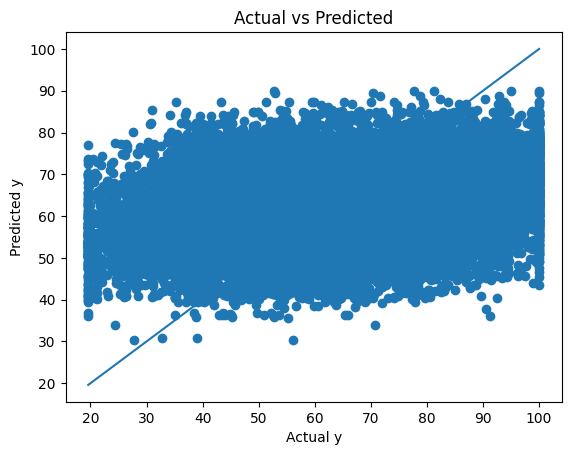

In [23]:
import matplotlib.pyplot as plt

y_train_pred = model.predict(X_train_scaled)

plt.figure()
plt.scatter(y_train, y_train_pred)
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("Actual vs Predicted")
plt.plot(
    [y_train.min(), y_train.max()],
    [y_train.min(), y_train.max()],
)
plt.show()


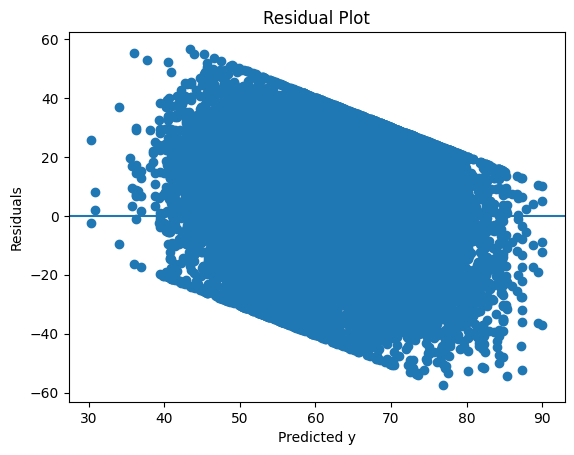

In [24]:
residuals = y_train - y_train_pred

plt.figure()
plt.scatter(y_train_pred, residuals)
plt.axhline(0)
plt.xlabel("Predicted y")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()
